In [6]:
from transformers import AutoImageProcessor, TFResNetModel,  TFResNetForImageClassification
from datasets import load_dataset
import tensorflow as tf

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = TFResNetModel.from_pretrained("microsoft/resnet-50")

inputs = image_processor(image, return_tensors="tf")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
print(list(last_hidden_states.shape))

model_classifier = TFResNetForImageClassification.from_pretrained("microsoft/resnet-50")

logits = model_classifier(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = int(tf.math.argmax(logits, axis=-1))
print(model_classifier.config.id2label[predicted_label])

No config specified, defaulting to: cats-image/image
Found cached dataset cats-image (/Users/osorcunozdemir/.cache/huggingface/datasets/huggingface___cats-image/image/1.9.0/68fbc793fb10cd165e490867f5d61fa366086ea40c73e549a020103dcb4f597e)
100%|██████████| 1/1 [00:00<00:00, 435.73it/s]
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some layers from the model checkpoint at microsoft/resnet-50 were not used when initializing TFResNetModel: ['classifier.1']
- This IS expected if you are initializing TFResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model f

[1, 2048, 7, 7]


All model checkpoint layers were used when initializing TFResNetForImageClassification.

All the layers of TFResNetForImageClassification were initialized from the model checkpoint at microsoft/resnet-50.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFResNetForImageClassification for predictions without further training.


tiger cat


In [11]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image'],
        num_rows: 1
    })
})

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Loading train and test datasets
with np.load('./input/train_data_label.npz') as data:
    train_data = data['train_data']
    train_label = data['train_label']
    
with np.load('./input/test_data_label.npz') as data:
    test_data = data['test_data']
    test_label = data['test_label']


train_data, val_data, train_label, val_label = train_test_split(
    train_data, train_label, test_size=0.20, random_state=54020)



In [6]:
len(train_data)

21964

In [7]:
len(train_label)

21964

In [8]:
train_label[0]

17

In [13]:

## Convolutional Neural Network
print("Convolutional Neural Network Part Initiated.")
print("\n")

import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(2)

from keras import datasets, layers, models
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt


# Reshaping data for CNN

reshaped_train_data = np.array([np.reshape(i, (28, 28)) for i in train_data])
reshaped_test_data = np.array([np.reshape(i, (28, 28)) for i in test_data])
reshaped_val_data = np.array([np.reshape(i, (28, 28)) for i in val_data])

# Building CNN model

model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(layers.Dense(25, activation = 'softmax'))

print(model.summary())



Convolutional Neural Network Part Initiated.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 conv2d_2

In [14]:
from time import time

# Hyperparameter tuning

print("Hyperparameter Tuning")
print("\n")

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time()
history = model.fit(reshaped_train_data, train_label, epochs=15, batch_size = 100,   
                    validation_data=(reshaped_val_data, val_label),callbacks=[
                                               tf.keras.callbacks.EarlyStopping(
                                                   monitor='val_loss',
                                                   patience=3,
                                                   restore_best_weights=True
                                                   ),learning_rate_reduction])

print(f'Time taken to run: {time() - start} seconds')


Hyperparameter Tuning


Epoch 1/15


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


220/220 [==============================] - 10s 42ms/step - loss: 3.0051 - accuracy: 0.2442 - val_loss: 1.0814 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 2/15
220/220 [==============================] - 9s 41ms/step - loss: 1.0379 - accuracy: 0.6502 - val_loss: 0.3559 - val_accuracy: 0.9102 - lr: 0.0010
Epoch 3/15
220/220 [==============================] - 9s 41ms/step - loss: 0.5675 - accuracy: 0.8096 - val_loss: 0.1722 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 4/15
220/220 [==============================] - 10s 44ms/step - loss: 0.3335 - accuracy: 0.8863 - val_loss: 0.0545 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 5/15
220/220 [==============================] - 10s 44ms/step - loss: 0.2289 - accuracy: 0.9240 - val_loss: 0.0246 - val_accuracy: 0.9951 - lr: 0.0010
Epoch 6/15
220/220 [==============================] - 9s 41ms/step - loss: 0.1608 - accuracy: 0.9486 - val_loss: 0.0238 - val_accuracy: 0.9960 - lr: 0.0010
Epoch 7/15
220/220 [==============================] - 9s 42ms/step - los

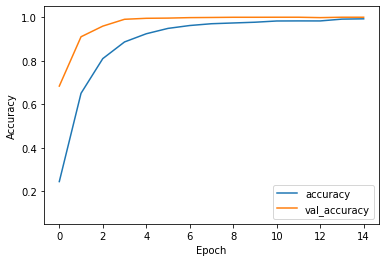

In [15]:

# Plotting validation accuracy

#print("Plotting validation accuracy")

plt.rcParams["figure.figsize"] = (5,5)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.05,1.05])
plt.legend(loc='lower right')
#plt.show()




In [16]:
from sklearn.metrics import f1_score

print("Test Loss and Test Accuracy: ")
test_loss, test_acc = model.evaluate(reshaped_test_data,  test_label, verbose=2)
print(test_loss,test_acc)

print("\n")

predicted_test_labels = [np.argmax(i) for i in model.predict(reshaped_test_data)]


# Accuracy of model on unseen data
print("Accuracy of model on unseen data")
print(f1_score(test_label, predicted_test_labels, average='weighted'))


Test Loss and Test Accuracy: 
225/225 - 1s - loss: 0.1691 - accuracy: 0.9590 - 914ms/epoch - 4ms/step
0.16914354264736176 0.9590072631835938


Accuracy of model on unseen data
0.9597111576692066


Generating the confusion matrix (two of them for different uses, one array, and one dataframe).








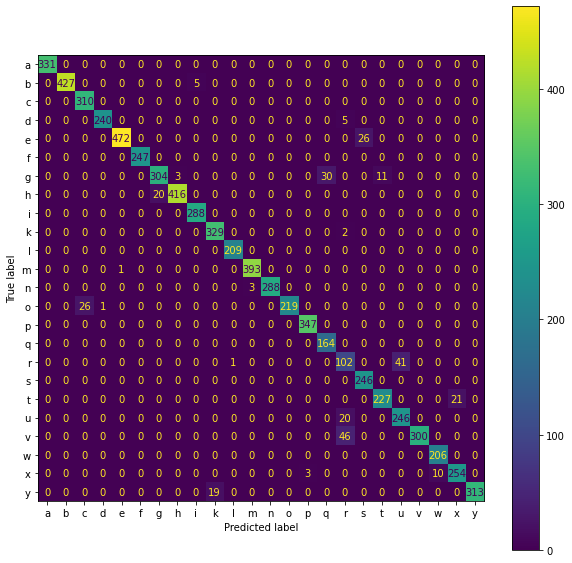

In [19]:

import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt


# Generating the confusion matrix (two of them for different uses, one array, and one dataframe).

print("Generating the confusion matrix (two of them for different uses, one array, and one dataframe).")

cm = confusion_matrix(test_label, predicted_test_labels, labels=np.unique(test_label))
cm_dataframe = pd.DataFrame(cm, index=np.unique(test_label), columns=np.unique(test_label))
cm_dataframe.set_index(cm_dataframe.index.map(lambda x: chr(int(x+97))), inplace=True)
cm_dataframe.rename(columns=lambda x: chr(x+97), inplace=True)
#print(cm_dataframe)

print("\n")

# Generating pretty graph for the confusion matrix. Teacher from practicals said it was pretty and good idea to include in report.

#print("Generating pretty graph for the confusion matrix. Teacher from practicals said it was pretty and good idea to include in report.")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_dataframe.index)
plt.rcParams["figure.figsize"] = (10,10)
disp.plot()
#plt.show()
print("\n")

# Metrics.
class_report = classification_report(test_label, predicted_test_labels, target_names=cm_dataframe.index)
#print(class_report)

print("\n")



In [20]:

# Easiest letters to classify (by bests F1 score).
print("Easiest letters to classify (by bests F1 score).")
precision, recall, fscore, support = precision_recall_fscore_support(test_label, predicted_test_labels)
per_class_metrics = pd.DataFrame({'Letter':cm_dataframe.index, 'Precision':precision.round(2), 'Recall':recall.round(2), 'F1 score':fscore.round(2)})
per_class_metrics.set_index('Letter', inplace=True)
per_class_metrics.sort_values(by='F1 score', ascending=False, inplace=True)
print(per_class_metrics.head())

print("\n")

# Hardest letters to classify (by worsts F1 score).
print("Hardest letters to classify (by worsts F1 score).")
per_class_metrics.sort_values(by='F1 score', ascending=True, inplace=True)
print(per_class_metrics.head())

print("\n")

Easiest letters to classify (by bests F1 score).
        Precision  Recall  F1 score
Letter                             
a            1.00     1.0      1.00
p            0.99     1.0      1.00
f            1.00     1.0      1.00
l            1.00     1.0      1.00
i            0.98     1.0      0.99


Hardest letters to classify (by worsts F1 score).
        Precision  Recall  F1 score
Letter                             
r            0.58    0.71      0.64
u            0.86    0.92      0.89
g            0.94    0.87      0.90
q            0.85    1.00      0.92
v            1.00    0.87      0.93


